In [6]:
%matplotlib inline

## Do cross validation

In [3]:
# load data
from surprise import Dataset, Reader
train_reader = Reader(line_format='item rating user', sep=',',skip_lines=1) 
train_file = '../data/data_train_surprise.csv'
train_data = Dataset.load_from_file(train_file, reader=train_reader)

In [4]:
# do cross validation
from surprise import SVD
from surprise.accuracy import rmse
import numpy as np
from surprise.evaluate import evaluate

#params = {'n_factors':12,'n_epochs':20,'lr_all':0.005,'reg_all':0.0359,'biased':True}
params = {'n_factors':100,'n_epochs':20,'lr_all':0.005,'reg_all':0.02,'biased':True} # default
#train_data.split(n_folds=2)
algo = SVD(n_factors=params['n_factors'],n_epochs=params['n_epochs'],lr_all=params['lr_all'],reg_all=params['reg_all'])
#algo = SVD()
perf=evaluate(algo, train_data, measures=['rmse'], with_dump=False, dump_dir=None, verbose=1)

# nepoch K   lr_all  reg_all  rmse 
# 120    40  0.001   0.00005  0.9984
# 80     40  0.001   0.00005  0.9999 
# 80     40  0.01    0.00005  1.0105 
# 80     40  0.01    0.02     1.0058
# 80     40  0.01    0.2      1.0071 
# 40     40  0.001   0.2      1.0042
# 80     40  0.001   0.2      1.0043
# 120    40  0.001   0.2      1.0047
# 40    100  0.001   0.00005  1.0013     
# 80    100  0.001   0.0005   1.0017 
# 120    100  0.001   0.0005  1.0002 
# 120    100  0.001   0.005   
# 120    40  0.001   0.0005   1.0016 
# 120    40  0.001   0.00001  1.0032 

Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.9974
------------
Fold 2
RMSE: 0.9979
------------
Fold 3
RMSE: 0.9938
------------
Fold 4
RMSE: 0.9982
------------
Fold 5
RMSE: 0.9945
------------
------------
Mean RMSE: 0.9964
------------
------------


In [12]:
def evaluate_k_fold(n_factors, n_epochs, lr_all, reg_all):
    algo = SVD(n_factors=n_factors,n_epochs=n_epochs,lr_all=lr_all,reg_all=reg_all)
    n_folds = 3
    train_data.split(n_folds=n_folds)
    rmses_test = []
    for trainset, testset in train_data.folds():
        # train and test algorithm.
        algo.train(trainset)
        predictions_test = algo.test(testset)
        # Compute and print Root Mean Squared Error
        rmse_test_k = rmse(predictions_test, verbose=False)
        rmses_test.append(rmse_test_k)
    rmse_test = np.mean(rmses_test) 
    return rmse_test

params = {'n_factors':100,'n_epochs':20,'lr_all':0.005,'reg_all':0.02,'biased':True} # default
n_factors_range = np.array([100])#np.linspace(10,30,21)
reg_all_range = np.logspace(-3,-1,10)
n_epochs_range = np.arange(6,30,2)

def run_simulation(n_factors_range, reg_all_range, n_epochs_range):
    results_path = '../results/SGD_surprise/'
    rmses = np.empty((len(n_factors_range),len(reg_all_range), len(n_epochs_range)))
    for i,n_factors in enumerate(n_factors_range):
        print('testing with n_factors={}'.format(n_factors))
        for j,reg_all in enumerate(reg_all_range):
            print('testing with reg_all={}'.format(reg_all))
            for k,n_epochs in enumerate(n_epochs_range):
                print('testing with n_epochs={}'.format(n_epochs))
                rmses[i,j,k] = evaluate_k_fold(int(n_factors),n_epochs,params['lr_all'],reg_all)
                print('rmse={}'.format(rmses[i,j,k]))
            #results_name = 'rmse_{}_{}'.format(n_factors, reg_all)
            #np.savetxt(results_path + results_name + '.csv', rmses[i,j,:], delimiter=",")
        np.save('../results/rmse_tmp.csv', rmses)
        print('saved for n_factors={}, reg_all={} n_epochs={}'.format(n_factors, reg_all, n_epochs))
    return rmses
rmses = run_simulation(n_factors_range, reg_all_range, n_epochs_range)

testing with n_factors=100
testing with reg_all=0.001
testing with n_epochs=6
rmse=1.0012821042820408
testing with n_epochs=8
rmse=1.0005429328418942
testing with n_epochs=10
rmse=0.9995394730422827
testing with n_epochs=12
rmse=0.9993954583506294
testing with n_epochs=14
rmse=0.9990528767632493
testing with n_epochs=16
rmse=0.9988050705856627
testing with n_epochs=18
rmse=0.9993099219645393
testing with n_epochs=20
rmse=0.9995166968324974
testing with n_epochs=22
rmse=0.999500171048893
testing with n_epochs=24
rmse=0.9998330359591282
testing with n_epochs=26
rmse=1.0005389767568709
testing with n_epochs=28
rmse=1.0004824040357407
testing with reg_all=0.0016681005372000592
testing with n_epochs=6
rmse=1.0014918767444525
testing with n_epochs=8
rmse=1.0003190370724615
testing with n_epochs=10
rmse=1.0000565563984805
testing with n_epochs=12
rmse=0.9992516697699698
testing with n_epochs=14
rmse=0.9992066673881338
testing with n_epochs=16
rmse=0.9988827645468393
testing with n_epochs=18
r

(1, 10, 12)
(1,)
(10,)


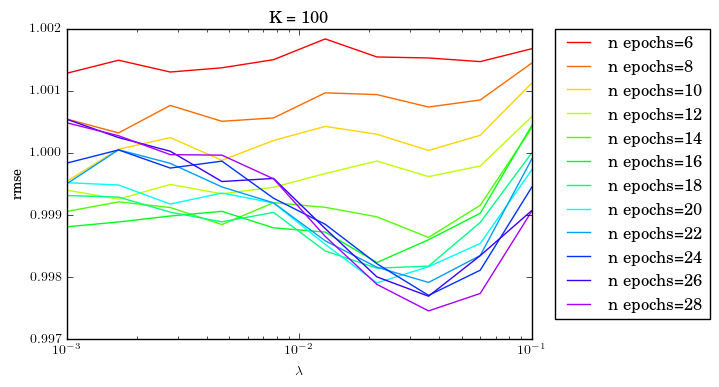

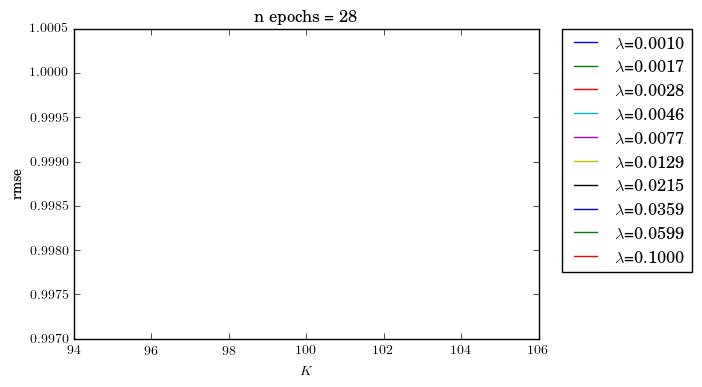

In [39]:
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0, 1.0, 15))

#print(rmses_clipped.shape)
rmses_clipped = rmses
results_path = '../results/SGD_surprise/'
lr_all = params['lr_all']
results_name = 'rmse_{}_{}_{}_{}'.format(n_epochs_range,n_factors_range,lr_all,reg_all_range)
#np.save(results_path + results_name, rmses_clipped)
#np.savetxt(results_path + results_name + '.csv', rmses_clipped, delimiter=",")
#test_rmses_clipped = np.loadtxt(results_path + results_name + '.csv', delimiter =',')
#assert np.isclose(test_rmses_clipped,rmses_clipped).all()
name = '../results/SGD_surprise/rmses.npy'
#rmses_clipped = np.load(name)

print(rmses_clipped.shape)
print(n_factors_range.shape)
print(reg_all_range.shape)

# Plot results
import matplotlib.pyplot as plt

num_n_factors = rmses_clipped.shape[0]
num_reg_all = rmses_clipped.shape[1]

plt.rc('text', usetex=True)
plt.rc('font', family='verdana')

#for k,n_epochs in enumerate(n_epochs_range):
#    results_name = 'rmse_{}_{}_{}_{}'.format(n_epochs,lr_all,n_factors_range,reg_all_range)
#    fig = plt.figure()
#    for i in range(num_n_factors):
#        plt.semilogx(reg_all_range,rmses_clipped[i,:,k],label='$K$={}'.format(n_factors_range[i]))
#    plt.xlabel('$\lambda$')
#    plt.ylabel('rmse')
#    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#    plt.title('n epochs = {}'.format(n_epochs))
#    fig.savefig(results_path + 'lambda_' + results_name + '.png')
#
#    fig = plt.figure()
#    for i in range(num_reg_all):
#        plt.plot(n_factors_range,rmses_clipped[:,i,k],label='$\lambda$={:1.4f}'.format(reg_all_range[i]))
#    plt.xlabel('$K$')
#    plt.ylabel('rmse')
#    plt.title('n epochs = {}'.format(n_epochs))
#    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#    fig.savefig(results_path + 'K_' + results_name + '.png')

for i, n_factor in enumerate(n_factors_range):
    results_name = 'rmse_{}_{}_{}_{}'.format(n_epochs,lr_all,n_factors_range,reg_all_range)
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    for k,n_epochs in enumerate(n_epochs_range):
        ax.semilogx(reg_all_range,rmses_clipped[i,:,k],label='n epochs={}'.format(n_epochs),color=colors[k])
    ax.set_xlabel('$\lambda$')
    ax.set_ylabel('rmse')
    ax.set_title('K = {}'.format(n_factor))
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    fig.savefig(results_path + 'lambda_' + results_name + '.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

    fig = plt.figure(2)
    ax = fig.add_subplot(111)
    for j in range(num_reg_all):
        ax.plot(n_factors_range,rmses_clipped[:,j,k],label='$\lambda$={:1.4f}'.format(reg_all_range[j]))
    ax.set_xlabel('$K$')
    ax.set_ylabel('rmse')
    ax.set_title('n epochs = {}'.format(n_epochs))
    lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    fig.savefig(results_path + 'K_' + results_name + '.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

#x = np.arange(-2*np.pi, 2*np.pi, 0.1)
#ax.plot(x, np.sin(x), label='Sine')
#ax.plot(x, np.cos(x), label='Cosine')
#ax.plot(x, np.arctan(x), label='Inverse tan')
#handles, labels = ax.get_legend_handles_labels()
#lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1))
#ax.grid('on')
#fig.savefig('samplefigure', bbox_extra_artists=(lgd,), bbox_inches='tight') 
#np.savetxt(results_path + results_name + '.csv', rmses_clipped, delimiter=",")
#test_rmses_clipped = np.loadtxt(results_path + results_name + '.csv', delimiter =',')
#assert np.isclose(test_rmses_clipped,rmses_clipped).all()

##  Train on whole data

In [21]:
# load data
from surprise import Dataset, Reader
fold_reader = Reader(line_format='item rating user', sep=',',skip_lines=1) 
# fold_files = [(train_set, test_set)]
fold_files = [('../data/data_train_surprise.csv', '../data/sampleSubmission_surprise.csv')]
fold_data = Dataset.load_from_folds(fold_files, reader=fold_reader)

In [22]:
# train algorithm.
from surprise import SVD
from surprise.accuracy import rmse
from surprise.dump import dump

algo = SVD(n_factors=params['n_factors'],n_epochs=params['n_epochs'],lr_all=params['lr_all'],reg_all=params['reg_all'])
for (trainset, testset) in fold_data.folds():
    print('training SVD...')
    algo.train(trainset)
    print('testing SVD...')
    predictions_svd = algo.test(testset)
    #rmse(predictions_svd)
    dump('../results/dump_SVD', predictions_svd, trainset, algo)

training SVD...
testing SVD...
The dump has been saved as file ../results/dump_SVD


## Save submission

In [23]:
# create correct format
def create_submission_dataframe(df_simple):
    #df_svd['err'] = abs(df_svd.est - df_svd.est.round())
    #print(df_svd.where(df_svd['err']<0.001))
    #if (df_svd['err']<0.001):
        #df_svd['est'] = df_svd['est'].round()
    #print(df_svd.where(df_svd['err']<0.001))
    print('Raw: \n',df_simple.head())
    df_simple["Id"] = "r" + df_simple["iid"].map(str) + "_c" +df_simple["uid"].map(str)
    df_simple["Prediction"] = df_simple["est"].clip(0,5)
    df_submission = df_simple.drop(["iid","uid","est","details","rui"],1)
    print('Submission: \n',df_submission.head()) 
    return df_submission

Raw: 
   uid  iid  rui       est                    details
0   1   37  3.0  3.404940  {'was_impossible': False}
1   1   73  3.0  2.977539  {'was_impossible': False}
2   1  156  3.0  3.727564  {'was_impossible': False}
3   1  160  3.0  3.215529  {'was_impossible': False}
4   1  248  3.0  3.509638  {'was_impossible': False}


In [24]:
import pickle
import pandas as pd
dump_obj_svd = pickle.load(open('../results/dump_SVD', 'rb'))
df_svd = pd.DataFrame(dump_obj_svd['predictions'], columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_svd_submission = create_submission_dataframe(df_svd)

# save submission
output_path = '../results/submission_surprise.csv'
df_svd_new.to_csv(output_path,columns=["Id","Prediction"],index=False)
print('Submission: \n',df_svd_new.head())

Submission: 
         Id  Prediction
0   r37_c1    3.404940
1   r73_c1    2.977539
2  r156_c1    3.727564
3  r160_c1    3.215529
4  r248_c1    3.509638


In [30]:
## Save ratings matrix for all training entries
from surprise import Dataset, Reader
fold_reader = Reader(line_format='item rating user', sep=',',skip_lines=1) 
# fold_files = [(train_set, test_set)]
fold_files = [('../data/data_train_surprise.csv', '../data/data_train_surprise.csv')]
fold_data = Dataset.load_from_folds(fold_files, reader=fold_reader)
from surprise import SVD
from surprise.accuracy import rmse
from surprise.dump import dump
for (trainset, testset) in fold_data.folds():
    print('testing SVD on full dataset...')
    predictions_svd = algo.test(testset)
    print('rmse:',rmse(predictions_svd))
import pandas as pd
df_svd = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    

df_submission = 
# save matrix
output_path = '../results/submission_surprise_full.csv'
df_submission.to_csv(output_path,columns=["Id","Prediction"],index=False)

training SVD...
testing SVD...
The dump has been saved as file ../results/dump_SVD_full
Raw: 
   uid iid  rui       est                    details
0   1  44  4.0  3.551753  {'was_impossible': False}
1   1  61  3.0  3.767399  {'was_impossible': False}
2   1  67  4.0  2.950493  {'was_impossible': False}
3   1  72  3.0  3.443151  {'was_impossible': False}
4   1  86  5.0  3.504326  {'was_impossible': False}
Submission: 
        Id  Prediction
0  r44_c1    3.551753
1  r61_c1    3.767399
2  r67_c1    2.950493
3  r72_c1    3.443151
4  r86_c1    3.504326
